In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#corrtype = '2pt'
#xlim = [1.7,5.3]
#xticks = [2,3,4,5]
#xpref = 4
#corrtype = 'd2pt'
#xlim = [1.7,6.3]
#xticks = [2,3,4,5,6]
#xpref = 5
#corrtype = 'gV8'
#corrtype = 'dgV8'
#xlim = [0.7,4.3]
#xticks = [1,2,3,4]
#xpref = 3
#corrtype = 'gV10'
corrtype = 'dgV10'
xlim = [0.7,5.3]
xticks = [1,2,3,4,5]
xpref = 4
npref = 2
filename = './data/3296_stability_%s.csv' %corrtype
data = open(filename,'r')
df = pd.read_csv(filename,index_col=0).T
df

1state_t,1state_Q,1state_dZ0_q0_mean,1state_dZ0_q0_sdev,1state_dgV_q0_mean,1state_dgV_q0_sdev,1state_dZ0_q1_mean,1state_dZ0_q1_sdev,1state_dgV_q1_mean,1state_dgV_q1_sdev,2state_t,...,4state_t,4state_Q,4state_dZ0_q0_mean,4state_dZ0_q0_sdev,4state_dgV_q0_mean,4state_dgV_q0_sdev,4state_dZ0_q1_mean,4state_dZ0_q1_sdev,4state_dgV_q1_mean,4state_dgV_q1_sdev
1,1.918042e-26,-1.594614,0.035451,-3.120987,0.304145,-1.587925,0.035185,-3.504122,0.272848,1.0,...,1.0,0.967074,-1.454650,0.044182,-4.570335,0.220364,-1.470794,0.047788,-4.230824,0.313958
2,4.890717e-24,-1.591996,0.035937,-2.859581,0.338095,-1.586637,0.035607,-3.332176,0.308198,2.0,...,2.0,0.987832,-1.461351,0.036783,-4.360618,0.204509,-1.471090,0.035566,-3.918180,0.193126
3,3.960577e-24,-1.579747,0.036200,-2.948222,0.384774,-1.576443,0.035685,-3.473030,0.356839,3.0,...,3.0,0.949915,-1.454587,0.037451,-4.445723,0.222812,-1.464274,0.036447,-4.057205,0.216283
4,1.575117e-10,-1.569968,0.036032,-3.689916,0.277115,-1.571256,0.035466,-3.855289,0.262447,4.0,...,4.0,0.999293,-1.410990,0.057987,-4.659592,0.398280,-1.433810,0.043042,-4.143604,0.261345


In [85]:
# plot params
figsize = (3.50394*2,2*2.1655535534)
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1
plt_axes = [0.14,0.155,0.825,0.825]
# state and q label
pparam = dict()
# state
pparam['color'] = dict()
pparam['color']['1state'] = '#ec5d57' # red
pparam['color']['2state'] = '#70bf41' # green
pparam['color']['3state'] = '#51a7f9' # blue
pparam['color']['4state'] = '#b36ae2' # purple
# q
pparam['shape'] = dict()
pparam['shape']['q0'] = 'o'
pparam['shape']['q1'] = 's'
# label translator
pparam['label'] = dict()
pparam['label']['2pt'] = 'C_{\mathrm{2pt}}(t)'
pparam['label']['d2pt'] = 'C^\prime_{\mathrm{2pt}}(t)'
pparam['label']['gV8'] = 'C_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['dgV8'] = 'C^\prime_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['gV10'] = 'C_{\mathrm{3pt}}(10,t^\prime)'
pparam['label']['dgV10'] = 'C^\prime_{\mathrm{3pt}}(10,t^\prime)'

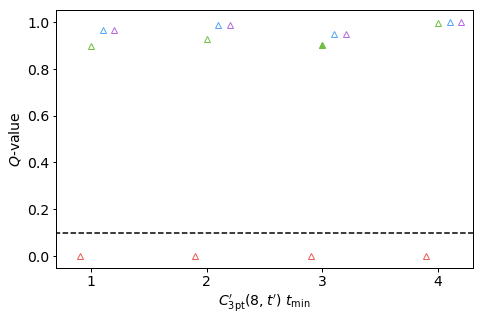

In [86]:
fig = plt.figure('Q-value stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    xshifted = x + 0.1*(nstate-2)
    y = df['%sstate_Q' %nstate]
    ax.errorbar(xshifted,y=y,marker='^',color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
ax.errorbar(xpref+ 0.1*(npref-2),y=df.loc[df['2state_t']==xpref]['%sstate_Q' %npref],marker='^',color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
            elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
ax.errorbar(x=[0,10],y=[0.1,0.1],color='k',ls='--')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$Q$-value', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_Q.pdf' %corrtype, transparent=True)

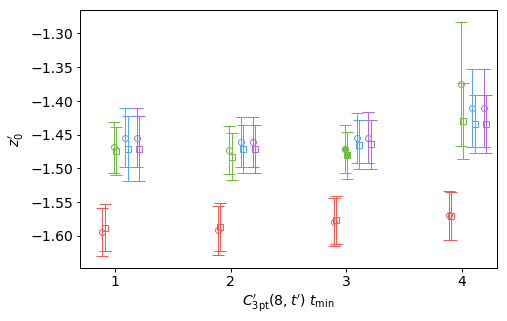

In [87]:
fig = plt.figure('dZ0 stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dZ0_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dZ0_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+0.02*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dZ0_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$z_0^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dZ0.pdf' %corrtype, transparent=True)

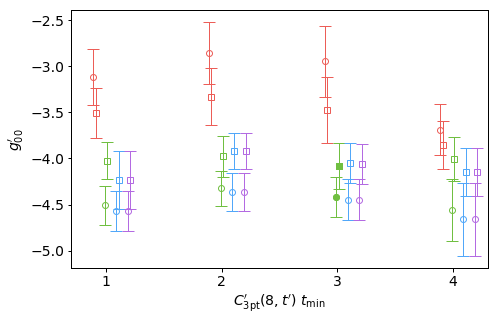

In [88]:
fig = plt.figure('dgV stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dgV_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dgV_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+ 0.02*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dgV_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$g_{00}^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dgV.pdf' %corrtype, transparent=True)

In [89]:
# logGBF of preferred fit
nstate = [1,2,3,4]
logGBF = [828.02,893.45,893.45,893.45]